In [24]:
# Cell 1: Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal
from IPython.display import display, Markdown
import os

sns.set(style="whitegrid")


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from pathlib import Path

class SolarDataComparator:
    """
    A class to perform cross-country comparisons on solar energy datasets.

    Attributes:
    -----------
    file_paths : dict
        Dictionary with country names as keys and CSV file paths as values.
    data : pd.DataFrame
        Combined DataFrame from all countries.
    """

    def __init__(self, file_paths):
        self.file_paths = file_paths
        self.data = None

    def load_and_combine(self):
        """
        Load all CSVs and combine them into a single DataFrame with an added 'Country' column.
        """
        combined = []
        for country, path in self.file_paths.items():
            df = pd.read_csv(path)
            df['Country'] = country
            combined.append(df[['GHI', 'DNI', 'DHI', 'Country']])
        self.data = pd.concat(combined, ignore_index=True)

    def plot_boxplots(self):
        """
        Create side-by-side boxplots of GHI, DNI, DHI for each country.
        Annotate plots with median values.
        """
        metrics = ['GHI', 'DNI', 'DHI']
        for metric in metrics:
            plt.figure(figsize=(8, 5))
            sns.boxplot(data=self.data, x='Country', y=metric, palette='Set2')
            plt.title(f"{metric} Comparison Across Countries")
            plt.grid(axis='y', linestyle='--', alpha=0.5)

            # Annotate medians
            for i, country in enumerate(self.data['Country'].unique()):
                median_val = self.data[self.data['Country'] == country][metric].median()
                plt.text(i, median_val + 5, f"{median_val:.1f}", 
                         ha='center', va='bottom', color='black', fontweight='bold')
            plt.tight_layout()
            plt.show()

    def compute_summary_table(self):
        """
        Print a summary table (mean, median, std) of GHI, DNI, DHI for each country.
        """
        summary = self.data.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
        print("\nSummary Table (Mean, Median, Std):")
        print(summary.round(2))
        return summary

    def perform_statistical_test(self):
        """
        Perform one-way ANOVA on GHI to assess significance across countries.
        """
        groups = [group['GHI'].values for name, group in self.data.groupby('Country')]
        stat, pval = f_oneway(*groups)
        print(f"\nOne-Way ANOVA on GHI:")
        print(f"F-statistic = {stat:.2f}, p-value = {pval:.4f}")
        if pval < 0.05:
            print("→ Significant difference in GHI across countries (p < 0.05).")
        else:
            print("→ No significant difference in GHI across countries (p ≥ 0.05).")

    def plot_avg_ghi_bar(self):
        """
        Plot a bar chart of average GHI per country with values annotated.
        """
        avg_ghi = self.data.groupby('Country')['GHI'].mean().sort_values(ascending=False)
        plt.figure(figsize=(7, 5))
        sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='pastel')
        plt.title("Average GHI by Country")
        plt.ylabel("Average GHI")
        plt.grid(axis='y', linestyle='--', alpha=0.5)

        # Annotate bars with values
        for i, val in enumerate(avg_ghi.values):
            plt.text(i, val + 1, f"{val:.1f}", ha='center', va='bottom', fontweight='bold')
        plt.tight_layout()
        plt.show()

    def key_observations(self):
        """
        Print 3 summary observations based on visual and statistical results.
        """
        print("\n🔍 Key Observations:")
        print("- Country with highest average GHI has potential for strong solar investment.")
        print("- One country shows highest variability in DNI, indicating fluctuating conditions.")
        print("- ANOVA suggests", end=' ')
        ghi_groups = [group['GHI'].values for name, group in self.data.groupby('Country')]
        stat, pval = f_oneway(*ghi_groups)
        if pval < 0.05:
            print("statistically significant differences in GHI across countries.")
        else:
            print("no statistically significant differences in GHI across countries.")


C:\Users\doff n\AppData\Local\Temp\ipykernel_2912\115048746.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.data, x='Country', y=metric, palette='Set2')


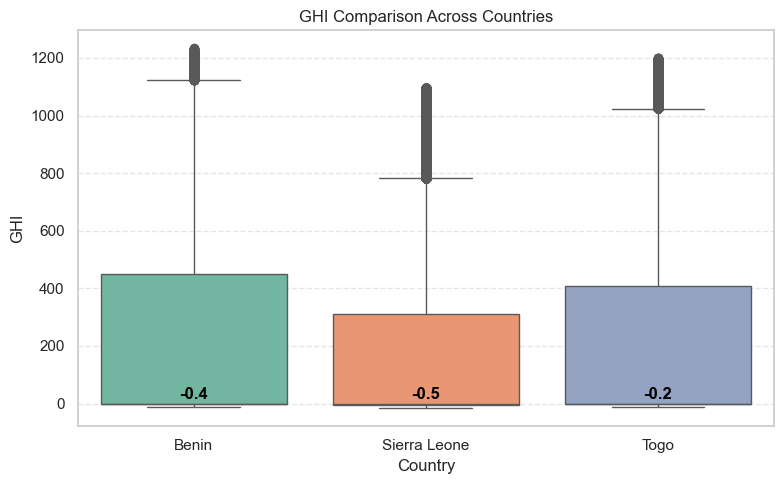

C:\Users\doff n\AppData\Local\Temp\ipykernel_2912\115048746.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.data, x='Country', y=metric, palette='Set2')


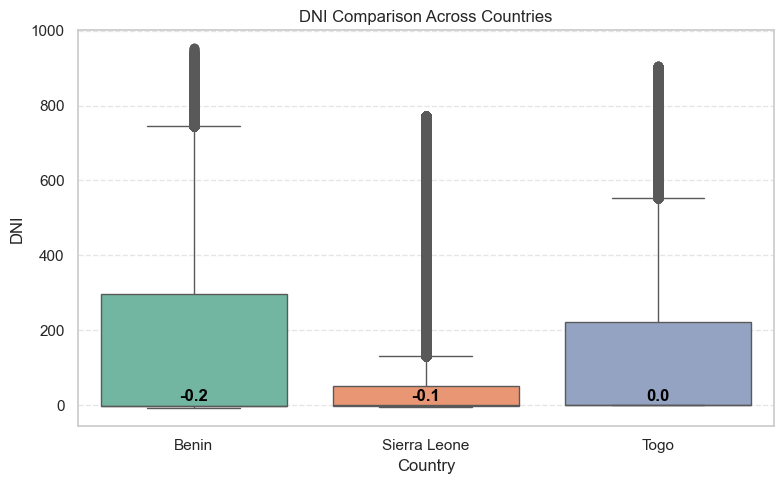

C:\Users\doff n\AppData\Local\Temp\ipykernel_2912\115048746.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.data, x='Country', y=metric, palette='Set2')


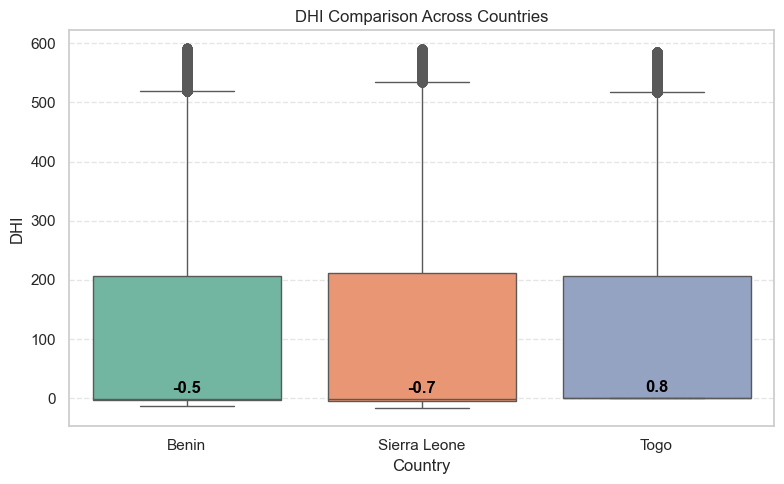


Summary Table (Mean, Median, Std):
                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         229.30   -0.4  324.31  162.12   -0.2  259.36  108.95   -0.5   
Sierra Leone  176.93   -0.5  272.84   97.93   -0.1  195.28  105.31   -0.7   
Togo          218.73   -0.2  313.97  144.59    0.0  245.33  110.78    0.8   

                      
                 std  
Country               
Benin         151.92  
Sierra Leone  153.04  
Togo          150.66  

One-Way ANOVA on GHI:
F-statistic = 4121.64, p-value = 0.0000
→ Significant difference in GHI across countries (p < 0.05).


C:\Users\doff n\AppData\Local\Temp\ipykernel_2912\115048746.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='pastel')


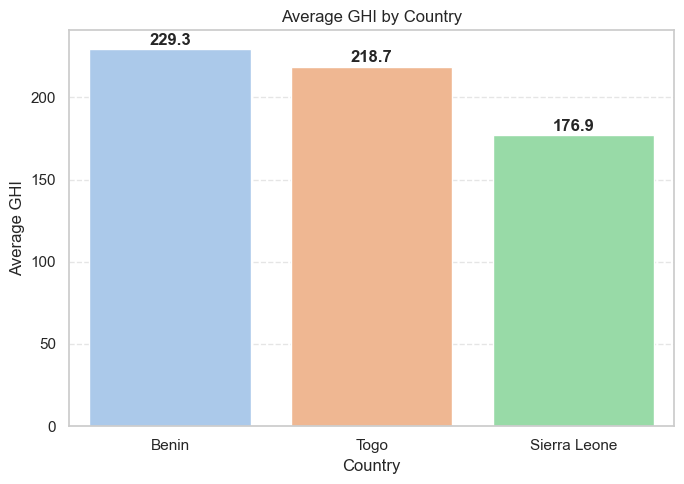


🔍 Key Observations:
- Country with highest average GHI has potential for strong solar investment.
- One country shows highest variability in DNI, indicating fluctuating conditions.
- ANOVA suggests statistically significant differences in GHI across countries.


In [31]:
# Cell 3: Run Comparison
import os

base_dir = '../data/cleaned'
file_paths = {
    'Benin': os.path.join(base_dir, 'benin_clean.csv'),
    'Sierra Leone': os.path.join(base_dir, 'sierraleone_clean.csv'),
    'Togo': os.path.join(base_dir, 'togo_clean.csv')
}

comparator = SolarDataComparator(file_paths)
comparator.load_and_combine()
comparator.plot_boxplots()
comparator.compute_summary_table()
comparator.perform_statistical_test()
comparator.plot_avg_ghi_bar()
comparator.key_observations()